# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import owmkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
temp =[]
cloud = []
humid = []
wind= []
name = []
lat = []
lon = []
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
for city in cities:
    try:
        query_url = url + "appid=" + owmkey + "&q=" + city + '&units=imperial'
        response = requests.get(query_url).json()
        temp.append(response['main']['temp'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        humid.append(response['main']['humidity'])
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        print(f'Data added {city}')
    
    except:
        (f'City Not Found')

Data added ushuaia
Data added sassandra
Data added longyearbyen
Data added sambava
Data added rikitea
Data added baiyin
Data added fortuna
Data added igarka
Data added kudahuvadhoo
Data added codrington
Data added pahrump
Data added busselton
Data added hobart
Data added san rafael
Data added torbay
Data added albany
Data added mar del plata
Data added bethel
Data added cabo san lucas
Data added new norfolk
Data added broome
Data added tasiilaq
Data added punta arenas
Data added zabaykalsk
Data added chokurdakh
Data added kapaa
Data added vaini
Data added hermanus
Data added bredasdorp
Data added srednekolymsk
Data added antalaha
Data added pitsunda
Data added saldanha
Data added cognac
Data added husavik
Data added iquitos
Data added port-gentil
Data added eureka
Data added hami
Data added san patricio
Data added biak
Data added port alfred
Data added ribeira grande
Data added marawi
Data added jamestown
Data added yellowknife
Data added bluefield
Data added xuddur
Data added iqaluit


Data added camacha
Data added melito di porto salvo
Data added johi
Data added kjollefjord
Data added sangar
Data added college
Data added roma
Data added batagay-alyta
Data added hay river
Data added sioux lookout
Data added nishihara
Data added hofn
Data added takoradi
Data added aneho
Data added pombia
Data added morondava
Data added salalah
Data added kavaratti
Data added aquiraz
Data added henties bay
Data added arlit
Data added howell
Data added valdivia
Data added katete
Data added trairi
Data added turbat
Data added bontang
Data added kontagora
Data added strezhevoy
Data added solana beach
Data added padang
Data added novyy urengoy
Data added yuxia
Data added kamenka
Data added vilhena
Data added alice springs
Data added vao
Data added gambela
Data added nelson bay
Data added bougouni
Data added veydelevka
Data added lappeenranta
Data added inuvik
Data added dilla
Data added iracoubo
Data added marienburg
Data added cedar city
Data added jaru
Data added longkou
Data added yahot

In [9]:

response['coord']['lat']
response['coord']['lon']
response['main']['temp']
response['main']['humidity']
response['wind']['speed']
response['clouds']['all']
response['name']
len(temp)

511

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cd = pd.DataFrame({
    'City': name,
    'Latitude': lat,
    'Longitude': lon,
    'Temp': temp,
    'Cloudiness': cloud,
    'Humidity': humid,
    'Wind': wind  
})
cd.head()

,City,Latitude,Longitude,Temp,Cloudiness,Humidity,Wind
0,Ushuaia,-54.81,-68.31,37.40,75,74,4.70
1,Sassandra,4.95,-6.09,77.11,100,97,11.74
2,Longyearbyen,78.22,15.63,33.80,75,64,24.16
3,Sambava,-14.27,50.17,72.70,56,100,18.01
4,Rikitea,-23.12,-134.97,72.66,68,100,13.53


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

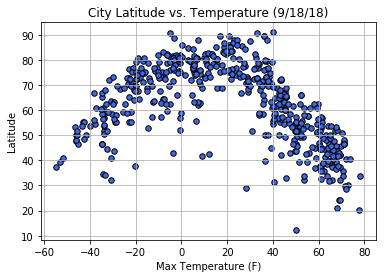

In [19]:
plt.title('City Latitude vs. Temperature (9/18/18)')
plt.ylabel('Latitude')
plt.xlabel('Max Temperature (F)')

plt.grid()
plt.scatter(cd['Latitude'],cd['Temp'], marker = 'o', color = 'royalblue', s = 30, edgecolor = 'black')
plt.savefig('City Latitude vs. Temperature')

#### Latitude vs. Humidity Plot

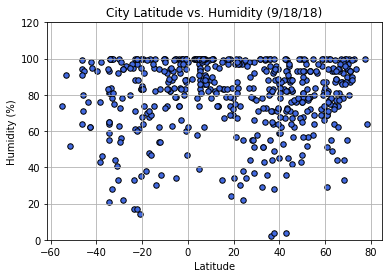

In [24]:
plt.title('City Latitude vs. Humidity (9/18/18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.ylim(0,120)
plt.grid()
plt.scatter(cd['Latitude'],cd['Humidity'], marker = 'o', color = 'royalblue', s = 30, edgecolor = 'black')
plt.savefig('City Latitude vs. Humidity')

#### Latitude vs. Cloudiness Plot

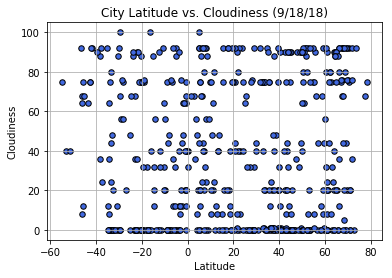

In [28]:
plt.title('City Latitude vs. Cloudiness (9/18/18)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

plt.grid()
plt.scatter(cd['Latitude'],cd['Cloudiness'], marker = 'o', color = 'royalblue', s = 30, edgecolor = 'black')
plt.savefig('City Latitude vs. Cloudiness')

#### Latitude vs. Wind Speed Plot

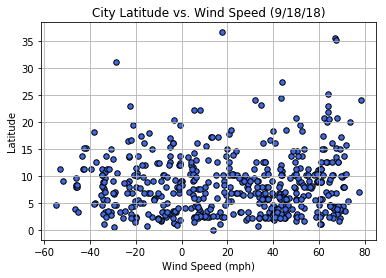

In [26]:
plt.title('City Latitude vs. Wind Speed (9/18/18)')
plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')

plt.grid()
plt.scatter(cd['Latitude'],cd['Wind'], marker = 'o', color = 'royalblue', s = 30, edgecolor = 'black')
plt.savefig('City Latitude vs. Wind Speed')